In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from regression import (logreg, utils)
from sklearn.preprocessing import StandardScaler

C:\Users\chati\AppData\Local\Temp\ipykernel_47968\2194538674.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
num_feats=6
W = np.random.randn(num_feats + 1).flatten()

In [3]:
def sigmoid(x, b0, b1):
    z=b0 + b1*x
    return 1/(1+np.exp(-z))

def sigmoid_reformat(x, b0, b1):
    z=b0 + b1*x
    return np.exp(z)/(1+np.exp(z))

def simple_sigmoid(z):
    return 1/(1+np.exp(-z))

# takes in matrix of features where rows represent samples and columns represent features and computes the sigmoidal output for each (probability of each sample)
def multivar_sigmoid(X, W):
    px=[simple_sigmoid(np.sum(np.multiply(x, W))) for x in X]
    return px

def binarize_values(Y, threshold=0.5):
    Y_bin=[1 if y>=threshold else 0 for y in Y]
    return Y_bin


In [4]:
x=2
b0, b1=-0.27830945,  0.04422344
print(sigmoid(x, b0, b1))
print(sigmoid_reformat(x, b0, b1))

0.45267643135815605
0.45267643135815605


In [5]:
# features = ['Penicillin V Potassium 500 MG','Computed tomography of chest and abdomen','Plain chest X-ray (procedure)', 'Low Density Lipoprotein Cholesterol','Creatinine','AGE_DIAGNOSIS']
# X,y=utils.loadDataset(features, split_percent=None, split_seed=42)

In [8]:
X_train, X_val, y_train, y_val = utils.loadDataset(
    features=[
        'Penicillin V Potassium 500 MG',
        'Computed tomography of chest and abdomen',
        'Plain chest X-ray (procedure)',
        'Low Density Lipoprotein Cholesterol',
        'Creatinine',
        'AGE_DIAGNOSIS'
    ],
    split_percent=0.8,
    split_seed=42
)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])


In [9]:
def make_prediction(X, W):
    Z=[np.sum(np.multiply(x, W)) for x in X]
    px=[1/(1+np.exp(-z)) for z in Z]
    y_pred=[1 if y>=0.5 else 0 for y in px]
    return np.array(y_pred)

In [10]:
def loss_function(y_true, y_pred):
    # py=sum(y_pred)/len(y_pred)
    # Hy=[y*np.log(py)+(1-y)*np.log(1-py) for y in y_true]
    # Hy=(-1/len(y_pred))*sum(Hy)
    Hy=-np.mean(y_true*np.log((y_pred+0.0000001))+(1-y_true)*np.log(1-y_pred+0.0000001))
    return Hy

In [11]:
def calculate_gradient(y_true, X):
    Z=[np.sum(np.multiply(x, W)) for x in X]
    px=[1/(1+np.exp(-z)) for z in Z]
    weight_gradient=np.dot(np.array([yhat-y for yhat, y in zip(px, y_true)]), X)
    return weight_gradient

In [12]:
num_feats=6
W = np.random.randn(num_feats + 1).flatten()

In [13]:
h=1/(1+np.exp(-X_train@W))
c=1e-7
y_pred=[1+c if y>=0.5 else 0+c for y in h]
cost = (-1/len(y_train))*(np.transpose(y_train)@np.log(h) + np.transpose(1-y_train)@np.log(1-h))
print(cost)

0.6961298570673122


In [14]:
weight_gradient=X_train.T@(h-y_train)
weight_gradient=(1/len(y_train))*weight_gradient
print(weight_gradient)

[-0.11130735 -0.28663323 -0.02501509  0.          0.         -0.06044528
  0.0923136 ]


In [15]:
h

array([0.76576551, 0.62898281, 0.92078433, ..., 0.62896169, 0.94810195,
       0.88224003])

In [16]:
calculate_gradient(y_train, X_train)

array([-178.09175701, -458.613163  ,  -40.02414387,    0.        ,
          0.        ,  -96.71244488,  147.70176334])

In [17]:
Z=[np.sum(np.multiply(x, W)) for x in X_train]
px=[1/(1+np.exp(-z)) for z in Z]
(px-y_train) @ X_train


array([-178.09175701, -458.613163  ,  -40.02414387,    0.        ,
          0.        ,  -96.71244488,  147.70176334])

In [18]:
Z=[np.sum(np.multiply(x, W)) for x in X_train]
px=np.array([1/(1+np.exp(-z)) for z in Z])
t = np.float_(y_train)
p = np.float_(px)

# y_pred=[1 if y>=0.5 else 0 for y in px]
# t = np.float_(y_train)
# p = np.float_(y_pred)


# t = [0,1,1,0,0,1,1]
# p = [0.07,0.91,0.74,0.23,0.85,0.17,0.94]
# p=[0,1,1,0,0,1,1]
t = np.float_(t)
p = np.float_(p)


-np.mean(t * np.log(p + 0.0000001) + (1 - t) * np.log(1 - p + 0.0000001))



0.6961288262559485

In [19]:
px

array([0.76576551, 0.62898281, 0.92078433, ..., 0.62896169, 0.94810195,
       0.88224003])

In [20]:
h

array([0.76576551, 0.62898281, 0.92078433, ..., 0.62896169, 0.94810195,
       0.88224003])

In [21]:
y_pred=make_prediction(X_train, W)
y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
Hy = -np.mean((1-y_train) * np.log(1-y_pred) + y_train * np.log(y_pred))
print(Hy)

6.336426413604715


In [22]:
y_pred=make_prediction(X_train, W)
loss_function(y_train, y_pred)


6.336426292095493

In [7]:
num_feats=6
W = np.random.randn(num_feats + 1).flatten()
y_pred=make_prediction(X_train, W)
# loss_function(y_train, y_pred)
Z=[np.sum(np.multiply(x, W)) for x in X_train]
px=np.array([1/(1+np.exp(-z)) for z in Z])
-np.mean(y_train*np.log(px)+(1-y_train)*np.log(1-px))


NameError: name 'make_prediction' is not defined

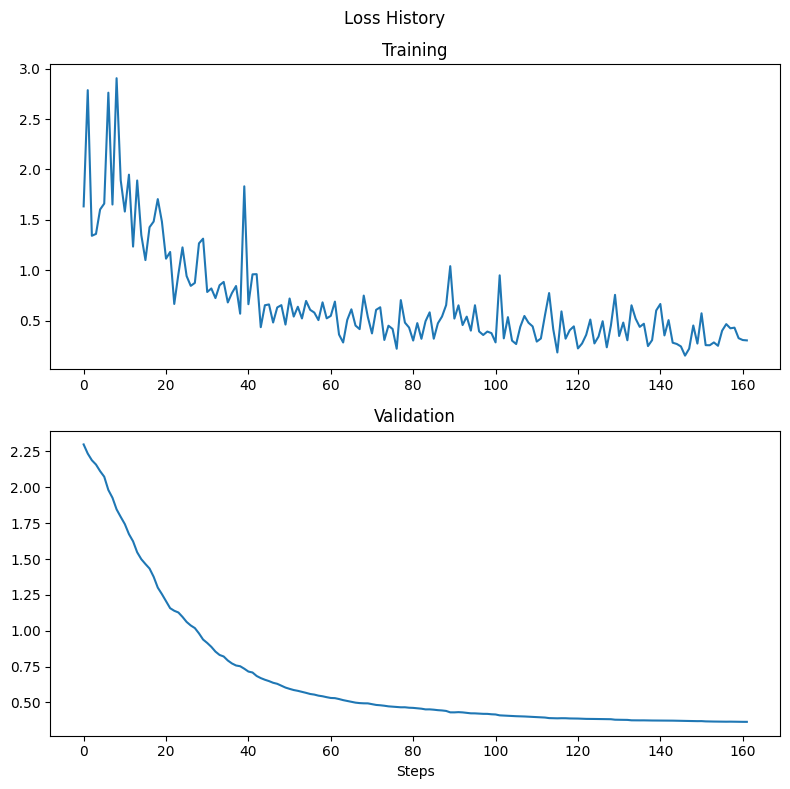

In [38]:

# Load data
X_train, X_val, y_train, y_val = utils.loadDataset(
    features=[
        'Penicillin V Potassium 500 MG',
        'Computed tomography of chest and abdomen',
        'Plain chest X-ray (procedure)',
        'Low Density Lipoprotein Cholesterol',
        'Creatinine',
        'AGE_DIAGNOSIS'
    ],
    split_percent=0.8,
    split_seed=42
)

# Scale the data, since values vary across feature. Note that we
# fit on the training data and use the same scaler for X_val.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

# For testing purposes, once you've added your code.
# CAUTION: hyperparameters have not been optimized.
log_model = logreg.LogisticRegressor(num_feats=6, learning_rate=0.1, tol=0.01, max_iter=10000, batch_size=10)
log_model.train_model(X_train, y_train, X_val, y_val)
log_model.plot_loss_history()


In [7]:
log_model.reset_model()